# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:https://github.com/Faiqa-Sajid/Pandas-Data-Science-Tasks/tree/master/SalesAnalysis/Output

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [64]:
# Importing numpy and pandas libraries to read the data

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records
linear_model = pd.read_csv(r"C:\Anaconda\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data/datafile.csv")
linear_model

#Here is our data set. Our target variable is Sales column.

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Day,Time,Month,Month - Year,Purchase Address,Street,City,Unnamed: 13,State,Zip
0,176558,USB-C Charging Cable,2,11.95,23.90,4/19/2019 8:46,19,8:46:00 AM,Apr,Apr-2019,"917 1st St, Dallas, TX 75001",917 1st St,Dallas,NaN,TX,75001
1,176559,Bose SoundSport Headphones,1,99.99,99.99,4/7/2019 22:30,7,10:30:00 PM,Apr,Apr-2019,"682 Chestnut St, Boston, MA 02215",682 Chestnut St,Boston,NaN,MA,2215
2,176560,Google Phone,1,600.00,600.00,4/12/2019 14:38,12,2:38:00 PM,Apr,Apr-2019,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,NaN,CA,90001
3,176560,Wired Headphones,1,11.99,11.99,4/12/2019 14:38,12,2:38:00 PM,Apr,Apr-2019,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,NaN,CA,90001
4,176561,Wired Headphones,1,11.99,11.99,4/30/2019 9:27,30,9:27:00 AM,Apr,Apr-2019,"333 8th St, Los Angeles, CA 90001",333 8th St,Los Angeles,NaN,CA,90001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,8.97,9/17/2019 20:56,17,8:56:00 PM,Sep,Sep-2019,"840 Highland St, Los Angeles, CA 90001",840 Highland St,Los Angeles,NaN,CA,90001
185946,259354,iPhone,1,700.00,700.00,9/1/2019 16:00,1,4:00:00 PM,Sep,Sep-2019,"216 Dogwood St, San Francisco, CA 94016",216 Dogwood St,San Francisco,NaN,CA,94016
185947,259355,iPhone,1,700.00,700.00,9/23/2019 7:39,23,7:39:00 AM,Sep,Sep-2019,"220 12th St, San Francisco, CA 94016",220 12th St,San Francisco,NaN,CA,94016
185948,259356,34in Ultrawide Monitor,1,379.99,379.99,9/19/2019 17:30,19,5:30:00 PM,Sep,Sep-2019,"511 Forest St, San Francisco, CA 94016",511 Forest St,San Francisco,NaN,CA,94016


In [66]:
linear_model.drop("Unnamed: 13", axis=1, inplace=True)

In [67]:
# Shape of our dataset
linear_model.shape

# Info our dataset
linear_model.info()

# Describe our dataset
linear_model.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Sales             185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Day               185950 non-null  int64  
 7   Time              185950 non-null  object 
 8   Month             185950 non-null  object 
 9   Month - Year      185950 non-null  object 
 10  Purchase Address  185950 non-null  object 
 11  Street            185950 non-null  object 
 12  City              185950 non-null  object 
 13  State             185950 non-null  object 
 14  Zip               185950 non-null  int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 21.3+ MB


,Order ID,Quantity Ordered,Price Each,Sales,Day,Zip
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,185.490917,15.759532,63877.518935
std,51512.737110,0.442793,332.731330,332.919771,8.782176,37776.308300
min,141234.000000,1.000000,2.990000,2.990000,1.000000,2215.000000
25%,185831.250000,1.000000,11.950000,11.950000,8.000000,10001.000000
50%,230367.500000,1.000000,14.950000,14.950000,16.000000,90001.000000
75%,275035.750000,1.000000,150.000000,150.000000,23.000000,94016.000000
max,319670.000000,9.000000,1700.000000,3400.000000,31.000000,98101.000000


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

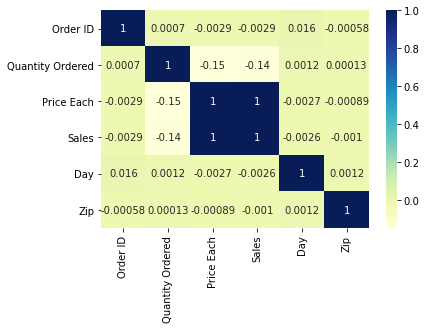

In [68]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Visualizing the data using heatmap
sns.heatmap(linear_model.corr(), cmap="YlGnBu", annot = True)
plt.show()

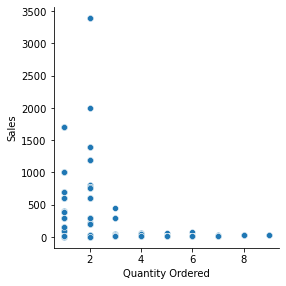

In [69]:
# Using pairplot we'll visualize the data for correlation:

sns.pairplot(linear_model, x_vars=['Quantity Ordered'], 
             y_vars='Sales', size=4, aspect=1, kind='scatter')
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [70]:
# Creating X and y
X = linear_model['Quantity Ordered']
y = linear_model['Sales']

In [71]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [72]:
#X_train data looks like this after splitting.

X_train


69854     1
8856      1
66839     1
470       1
24852     1
         ..
145332    1
82270     1
65615     1
77655     1
56088     1
Name: Quantity Ordered, Length: 130164, dtype: int64

In [73]:
#y_train data looks like this after splitting.

y_train

69854     109.99
8856       11.99
66839     149.99
470         3.84
24852     150.00
           ...  
145332      2.99
82270     149.99
65615     150.00
77655      14.95
56088      11.99
Name: Sales, Length: 130164, dtype: float64

In [74]:
#we’ll build the model using the statsmodel package. To do that, we need to import the statsmodel.api library to perform linear regression.

# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)




In [75]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const               303.184243
Quantity Ordered   -104.579056
dtype: float64

In [76]:
#Let’s see the summary of all the different parameters of the regression line fitted like R², probability of F-statistic, and p-value.
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2582.
Date:                Mon, 07 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:52:45   Log-Likelihood:            -9.3934e+05
No. Observations:              130164   AIC:                         1.879e+06
Df Residuals:                  130162   BIC:                         1.879e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              303.1842      2.488    121.834      0.000     298.307     308.062
Quantity Ordered  -104.5791      2.058    -50.813      0.000    -108.613    -100.545
==============================================================================
Omnibus:                    77733.623   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           646864.923
Skew:                           2.867   Prob(JB):                         0.00
Kurtosis:                      12.294   Cond. No.                         5.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Error Terms

Finally, plot your error terms!

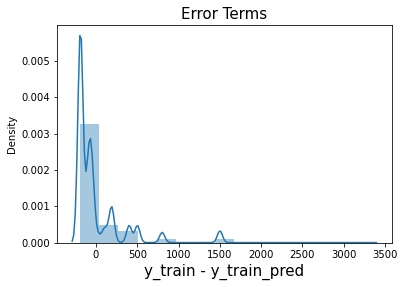

In [77]:
 # Plotting the histogram using the residual values
 # Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)   
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.019
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? 
Not particularly effective for my dataset.
3. Was your plot of the error terms a bell curve? No it is not bell curved.